in this notebook, OLS, 2SLS and GMM models in package linearmodels have been implemented on our data, using democratic as instrumental variable to check the effect of altruism on funding per GDP.
notice this is just an attempt (more specifically, to be more familiar with running regressions using python packages), democratic is unlikely to satisfy exogeneity constrain and it's also an weak instrument

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from auxiliary import *
import zipfile
import statsmodels.api as sm
from statsmodels.api import OLS, add_constant
from linearmodels import IV2SLS, IVLIML, IVGMM, IVGMMCUE
from linearmodels.iv.results import compare

sns.set_theme(style="ticks")

In [ ]:
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [6]:
long = pd.read_csv('data/result_long.csv')

x = ['posrecip', 'risktaking', 'patience', 'trust', 'negrecip', 'aid', 
'gdpcapita','govexpense', 'pop', 'oda_int', 'const', 'income_type', 'region']
long = sm.add_constant(long)
long_replace = long.replace({'funding_gdp': np.nan}, 0)
long_index = long_replace.set_index(['isocode', 'year'])
long_select = long_index[['funding_gdp', 'altruism', 'demo'] + x]
df = long_select.dropna()
df['year'] = pd.Categorical(df.index.to_frame()['year'])

x += ['year']
df.head()


funding_gdp  altruism  demo  posrecip  risktaking  patience  \
isocode year                                                                
AFG     2006       0.0000  0.166455  3.06  0.289641    0.120764  -0.20136   
        2008       0.2374  0.166455  3.02  0.289641    0.120764  -0.20136   
        2010       0.0150  0.166455  2.48  0.289641    0.120764  -0.20136   
        2011       0.0000  0.166455  2.48  0.289641    0.120764  -0.20136   
        2012       0.0000  0.166455  2.48  0.289641    0.120764  -0.20136   

                 trust  negrecip  aid   gdpcapita  govexpense         pop  \
isocode year                                                                
AFG     2006  0.315964  0.254712    0  263.733692      18.303  26433049.0   
        2008  0.315964  0.254712    0  364.660745      20.918  27722276.0   
        2010  0.315964  0.254712    0  543.303042      20.801  29185507.0   
        2011  0.315964  0.254712    0  591.162759      21.937  30117413.0   
        2012  0.315964  0.254712    0  641.871479      25.028  31161376.0   

              oda_int  const income_type      region  year  
isocode year                                                
AFG     2006        0    1.0  Low income  South Asia  2006  
        2008        0    1.0  Low income  South Asia  2008  
        2010        0    1.0  Low income  South Asia  2010  
        2011        0    1.0  Low income  South Asia  2011  
        2012        0    1.0  Low income  South Asia  2012

# heat map to check correlation between variables

<AxesSubplot:>

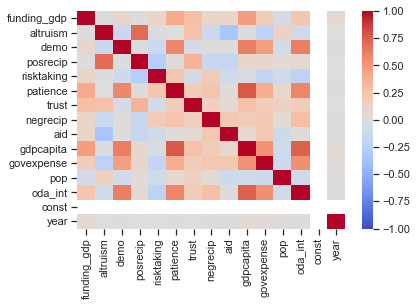

In [7]:

df_scale = long[['funding_gdp', 'altruism', 'demo'] + x]
sns.heatmap(df_scale.corr(), cmap="coolwarm", vmin=-1)

  

# simple ols 
# covariance type set to  heteroskedasticity-autocorrelation robust covariance 

In [8]:

ols = IV2SLS(df['funding_gdp'], df[['altruism', 'demo'] + x], None, None)
res_ols = ols.fit(cov_type='kernel')
res_ols

OLS Estimation Summary                            
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                      0.3773
Estimator:                        OLS   Adj. R-squared:                 0.3544
No. Observations:                 905   F-statistic:                    304.58
Date:                Tue, Dec 08 2020   P-value (F-stat)                0.0000
Time:                        23:36:39   Distribution:                 chi2(32)
Cov. Estimator:                kernel                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
altruism                             -0.0053     0.0058    -0.9184     0.3584     -0.0167      0.0060
demo                                 -0.0046     0.0018    -2.5649     0.0103     -0.0081     -0.0011
posrecip                             -0.0020     0.0053    -0.3791     0.7046     -0.0125      0.0084
risktaking                           -0.0009     0.0077    -0.1111     0.9115     -0.0160      0.0143
patience                              0.0202     0.0147     1.3744     0.1693     -0.0086      0.0491
trust                                 0.0218     0.0080     2.7254     0.0064      0.0061      0.0374
negrecip                             -0.0058     0.0065    -0.8946     0.3710     -0.0186      0.0070
aid                                   0.0027     0.0064     0.4190     0.6752     -0.0099      0.0153
gdpcapita                          9.585e-07  3.474e-07     2.7592     0.0058   2.777e-07   1.639e-06
govexpense                           -0.0001     0.0002    -0.6567     0.5114     -0.0004      0.0002
pop                               -9.856e-12  7.945e-12    -1.2405     0.2148  -2.543e-11   5.716e-12
oda_int                              -0.0075     0.0056    -1.3412     0.1799     -0.0184      0.0035
const                                 0.0227     0.0131     1.7312     0.0834     -0.0030      0.0485
income_type.Low income               -0.0016     0.0092    -0.1779     0.8588     -0.0197      0.0164
income_type.Lower middle income      -0.0056     0.0067    -0.8438     0.3988     -0.0187      0.0074
income_type.Upper middle income      -0.0047     0.0058    -0.8104     0.4177     -0.0162      0.0067
region.Europe & Central Asia          0.0069     0.0063     1.0906     0.2754     -0.0055      0.0192
region.Latin America & Caribbean      0.0119     0.0056     2.1136     0.0345      0.0009      0.0229
region.Middle East & North Africa     0.0101     0.0099     1.0151     0.3101     -0.0094      0.0296
region.North America                 -0.0058     0.0102    -0.5632     0.5733     -0.0259      0.0143
region.South Asia                     0.0212     0.0060     3.5500     0.0004      0.0095      0.0329
region.Sub-Saharan Africa             0.0162     0.0082     1.9691     0.0489   7.544e-05      0.0324
year.2008                             0.0024     0.0037     0.6519     0.5145     -0.0049      0.0098
year.2010                             0.0006     0.0018     0.3133     0.7541     -0.0029      0.0041
year.2011                            -0.0027     0.0021    -1.3101     0.1902     -0.0067      0.0013
year.2012                            -0.0011     0.0024    -0.4619     0.6441     -0.0059      0.0036
year.2013                            -0.0034     0.0022    -1.5278     0.1266     -0.0078      0.0010
year.2014                             0.0010     0.0024     0.4381     0.6613     -0.0036      0.0057
year.2015                             0.0042     0.00

# simple 2sls (z = democratic) 


In [9]:

iv = IV2SLS(df['funding_gdp'], df[x], df['altruism'], df['demo'])
res_iv = iv.fit(cov_type='kernel')
res_iv

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3282
Estimator:                    IV-2SLS   Adj. R-squared:                -5.5529
No. Observations:                 905   F-statistic:                    18.508
Date:                Tue, Dec 08 2020   P-value (F-stat)                0.9626
Time:                        23:36:42   Distribution:                 chi2(31)
Cov. Estimator:                kernel                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2715     0.4130     0.6573     0.5110     -0.5380      1.0810
risktaking                            0.0270     0.0618     0.4376     0.6617     -0.0941      0.1482
patience                             -0.0146     0.0715    -0.2047     0.8378     -0.1549      0.1256
trust                                 0.0363     0.0400     0.9076     0.3641     -0.0421      0.1146
negrecip                              0.0263     0.0484     0.5421     0.5877     -0.0687      0.1212
aid                                  -0.0344     0.0843    -0.4078     0.6834     -0.1996      0.1309
gdpcapita                          2.965e-06   3.18e-06     0.9324     0.3511  -3.268e-06   9.198e-06
govexpense                           -0.0027     0.0037    -0.7389     0.4600     -0.0099      0.0045
pop                                3.017e-11  6.762e-11     0.4461     0.6555  -1.024e-10   1.627e-10
oda_int                              -0.0155     0.0472    -0.3292     0.7420     -0.1079      0.0769
const                                 0.0047     0.0449     0.1050     0.9164     -0.0834      0.0928
income_type.Low income                0.0232     0.0453     0.5125     0.6083     -0.0656      0.1120
income_type.Lower middle income       0.0617     0.0972     0.6351     0.5253     -0.1288      0.2523
income_type.Upper middle income       0.0290     0.0467     0.6204     0.5350     -0.0625      0.1204
region.Europe & Central Asia         -0.0010     0.0300    -0.0339     0.9730     -0.0599      0.0579
region.Latin America & Caribbean      0.0220     0.0335     0.6573     0.5110     -0.0436      0.0876
region.Middle East & North Africa     0.0620     0.0708     0.8760     0.3810     -0.0767      0.2008
region.North America                  0.0584     0.1106     0.5279     0.5976     -0.1585      0.2753
region.South Asia                     0.0585     0.0931     0.6286     0.5296     -0.1239      0.2409
region.Sub-Saharan Africa             0.0420     0.0537     0.7819     0.4343     -0.0633      0.1473
year.2008                             0.0002     0.0074     0.0239     0.9809     -0.0144      0.0148
year.2010                             0.0037     0.0065     0.5626     0.5737     -0.0091      0.0164
year.2011                            -0.0039     0.0082    -0.4731     0.6362     -0.0199      0.0122
year.2012                            -0.0007     0.0080    -0.0935     0.9255     -0.0163      0.0148
year.2013                            -0.0041     0.0088    -0.4627     0.6436     -0.0214      0.0132
year.2014                             0.0009     0.0092     0.0944     0.9248     -0.0172      0.0189
year.2015                             0.0064     0.0086     0.7389     0.4600     -0.0105      0.0232
year.2016                             0.0039     0.0085     0.4611     0.6447     -0.0128      0.0206
year.2017                            -0.0022     0.

# simple GMM model 

In [10]:
gmm = IVGMM(df['funding_gdp'], df[x],
    df['altruism'], df['demo'])
res_gmm = gmm.fit(cov_type='kernel')
res_gmm


IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3282
Estimator:                     IV-GMM   Adj. R-squared:                -5.5529
No. Observations:                 905   F-statistic:                    562.12
Date:                Tue, Dec 08 2020   P-value (F-stat)                0.0000
Time:                        23:36:46   Distribution:                 chi2(31)
Cov. Estimator:                kernel                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2715     0.1499     1.8110     0.0701     -0.0223      0.5653
risktaking                            0.0270     0.0380     0.7123     0.4763     -0.0474      0.1015
patience                             -0.0146     0.0342    -0.4277     0.6689     -0.0818      0.0525
trust                                 0.0363     0.0211     1.7208     0.0853     -0.0050      0.0776
negrecip                              0.0263     0.0239     1.0991     0.2717     -0.0206      0.0731
aid                                  -0.0344     0.0351    -0.9799     0.3271     -0.1031      0.0344
gdpcapita                          2.965e-06  1.276e-06     2.3247     0.0201   4.652e-07   5.465e-06
govexpense                           -0.0027     0.0014    -1.9922     0.0463     -0.0054  -4.385e-05
pop                                3.017e-11  2.724e-11     1.1075     0.2681  -2.322e-11   8.355e-11
oda_int                              -0.0155     0.0278    -0.5576     0.5771     -0.0701      0.0390
const                                 0.0047     0.0224     0.2109     0.8330     -0.0391      0.0486
income_type.Low income                0.0232     0.0302     0.7699     0.4414     -0.0359      0.0823
income_type.Lower middle income       0.0617     0.0335     1.8416     0.0655     -0.0040      0.1275
income_type.Upper middle income       0.0290     0.0145     2.0025     0.0452      0.0006      0.0573
region.Europe & Central Asia         -0.0010     0.0072    -0.1410     0.8878     -0.0152      0.0131
region.Latin America & Caribbean      0.0220     0.0160     1.3760     0.1688     -0.0093      0.0533
region.Middle East & North Africa     0.0620     0.0279     2.2227     0.0262      0.0073      0.1167
region.North America                  0.0584     0.0421     1.3858     0.1658     -0.0242      0.1410
region.South Asia                     0.0585     0.0452     1.2941     0.1956     -0.0301      0.1471
region.Sub-Saharan Africa             0.0420     0.0292     1.4404     0.1498     -0.0152      0.0992
year.2008                             0.0002     0.0043     0.0414     0.9670     -0.0082      0.0086
year.2010                             0.0037     0.0027     1.3804     0.1675     -0.0015      0.0089
year.2011                            -0.0039     0.0029    -1.3414     0.1798     -0.0095      0.0018
year.2012                            -0.0007     0.0018    -0.4107     0.6813     -0.0043      0.0028
year.2013                            -0.0041     0.0028    -1.4716     0.1411     -0.0095      0.0014
year.2014                             0.0009     0.0031     0.2832     0.7770     -0.0052      0.0069
year.2015                             0.0064     0.0042     1.5183     0.1289     -0.0019      0.0146
year.2016                             0.0039     0.0048     0.8125     0.4165     -0.0055      0.0134
year.2017                            -0.0022     0.

# Continuously updating GMM model  

In [11]:
iv_gmm_cue = IVGMMCUE(df['funding_gdp'], df[x],
    df['altruism'], df['demo'])
res_cue = iv_gmm_cue.fit(cov_type='robust', display=True)
res_cue

         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1398
         Gradient evaluations: 42


IV-GMM Estimation Summary                           
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3282
Estimator:                     IV-GMM   Adj. R-squared:                -5.5529
No. Observations:                 905   F-statistic:                    97.565
Date:                Tue, Dec 08 2020   P-value (F-stat)                0.0000
Time:                        23:36:51   Distribution:                 chi2(31)
Cov. Estimator:                robust                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2715     0.1353     2.0063     0.0448      0.0063      0.5367
risktaking                            0.0270     0.0210     1.2911     0.1967     -0.0140      0.0681
patience                             -0.0146     0.0249    -0.5881     0.5565     -0.0635      0.0342
trust                                 0.0363     0.0149     2.4318     0.0150      0.0070      0.0655
negrecip                              0.0263     0.0163     1.6067     0.1081     -0.0058      0.0583
aid                                  -0.0344     0.0256    -1.3425     0.1794     -0.0846      0.0158
gdpcapita                          2.965e-06  1.125e-06     2.6359     0.0084   7.604e-07    5.17e-06
govexpense                           -0.0027     0.0012    -2.2297     0.0258     -0.0051     -0.0003
pop                                3.017e-11   2.19e-11     1.3774     0.1684  -1.276e-11   7.309e-11
oda_int                              -0.0155     0.0152    -1.0230     0.3063     -0.0453      0.0142
const                                 0.0047     0.0191     0.2465     0.8053     -0.0328      0.0422
income_type.Low income                0.0232     0.0155     1.4977     0.1342     -0.0072      0.0536
income_type.Lower middle income       0.0617     0.0322     1.9159     0.0554     -0.0014      0.1249
income_type.Upper middle income       0.0290     0.0169     1.7107     0.0871     -0.0042      0.0621
region.Europe & Central Asia         -0.0010     0.0112    -0.0911     0.9274     -0.0229      0.0209
region.Latin America & Caribbean      0.0220     0.0121     1.8110     0.0701     -0.0018      0.0458
region.Middle East & North Africa     0.0620     0.0239     2.5916     0.0096      0.0151      0.1089
region.North America                  0.0584     0.0360     1.6240     0.1044     -0.0121      0.1289
region.South Asia                     0.0585     0.0325     1.7979     0.0722     -0.0053      0.1223
region.Sub-Saharan Africa             0.0420     0.0189     2.2287     0.0258      0.0051      0.0790
year.2008                             0.0002     0.0126     0.0141     0.9888     -0.0245      0.0249
year.2010                             0.0037     0.0122     0.3007     0.7637     -0.0202      0.0276
year.2011                            -0.0039     0.0124    -0.3114     0.7555     -0.0283      0.0205
year.2012                            -0.0007     0.0123    -0.0603     0.9519     -0.0249      0.0234
year.2013                            -0.0041     0.0124    -0.3292     0.7420     -0.0284      0.0202
year.2014                             0.0009     0.0124     0.0700     0.9442     -0.0235      0.0252
year.2015                             0.0064     0.0124     0.5139     0.6073     -0.0179      0.0306
year.2016                             0.0039     0.0125     0.3150     0.7528     -0.0205      0.0284
year.2017                            -0.0022     0.

# using LIML model, perform better at weakly identified

In [12]:
iv_liml = IVLIML(df['funding_gdp'], df[x],
    df['altruism'], df['demo'])
res_liml = iv_liml.fit(cov_type='robust')
res_liml

IV-LIML Estimation Summary                          
==============================================================================
Dep. Variable:            funding_gdp   R-squared:                     -5.3282
Estimator:                    IV-LIML   Adj. R-squared:                -5.5529
No. Observations:                 905   F-statistic:                    97.565
Date:                Tue, Dec 08 2020   P-value (F-stat)                0.0000
Time:                        23:36:53   Distribution:                 chi2(31)
Cov. Estimator:                robust                                         
                                                                              
                                         Parameter Estimates                                         
=====================================================================================================
                                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------------------
posrecip                              0.2715     0.1353     2.0063     0.0448      0.0063      0.5367
risktaking                            0.0270     0.0210     1.2911     0.1967     -0.0140      0.0681
patience                             -0.0146     0.0249    -0.5881     0.5565     -0.0635      0.0342
trust                                 0.0363     0.0149     2.4318     0.0150      0.0070      0.0655
negrecip                              0.0263     0.0163     1.6067     0.1081     -0.0058      0.0583
aid                                  -0.0344     0.0256    -1.3425     0.1794     -0.0846      0.0158
gdpcapita                          2.965e-06  1.125e-06     2.6359     0.0084   7.604e-07    5.17e-06
govexpense                           -0.0027     0.0012    -2.2297     0.0258     -0.0051     -0.0003
pop                                3.017e-11   2.19e-11     1.3774     0.1684  -1.276e-11   7.309e-11
oda_int                              -0.0155     0.0152    -1.0230     0.3063     -0.0453      0.0142
const                                 0.0047     0.0191     0.2465     0.8053     -0.0328      0.0422
income_type.Low income                0.0232     0.0155     1.4977     0.1342     -0.0072      0.0536
income_type.Lower middle income       0.0617     0.0322     1.9159     0.0554     -0.0014      0.1249
income_type.Upper middle income       0.0290     0.0169     1.7107     0.0871     -0.0042      0.0621
region.Europe & Central Asia         -0.0010     0.0112    -0.0911     0.9274     -0.0229      0.0209
region.Latin America & Caribbean      0.0220     0.0121     1.8110     0.0701     -0.0018      0.0458
region.Middle East & North Africa     0.0620     0.0239     2.5916     0.0096      0.0151      0.1089
region.North America                  0.0584     0.0360     1.6240     0.1044     -0.0121      0.1289
region.South Asia                     0.0585     0.0325     1.7979     0.0722     -0.0053      0.1223
region.Sub-Saharan Africa             0.0420     0.0189     2.2287     0.0258      0.0051      0.0790
year.2008                             0.0002     0.0126     0.0141     0.9888     -0.0245      0.0249
year.2010                             0.0037     0.0122     0.3007     0.7637     -0.0202      0.0276
year.2011                            -0.0039     0.0124    -0.3114     0.7555     -0.0283      0.0205
year.2012                            -0.0007     0.0123    -0.0603     0.9519     -0.0249      0.0234
year.2013                            -0.0041     0.0124    -0.3292     0.7420     -0.0284      0.0202
year.2014                             0.0009     0.0124     0.0700     0.9442     -0.0235      0.0252
year.2015                             0.0064     0.0124     0.5139     0.6073     -0.0179      0.0306
year.2016                             0.0039     0.0125     0.3150     0.7528     -0.0205      0.0284
year.2017                            -0.0022     0.

# comparing of the results

In [13]:
res = dict()
res['OLS'] = res_ols
res['2SLS-Hetero'] = res_iv
res['GMM'] = res_gmm
res['GMM-CUE'] = res_cue
res['LIML'] = res_liml

compare(res)

,OLS,2SLS-Hetero,GMM,GMM-CUE,LIML
Dep. Variable,funding_gdp,funding_gdp,funding_gdp,funding_gdp,funding_gdp
Estimator,OLS,IV-2SLS,IV-GMM,IV-GMM,IV-LIML
No. Observations,905,905,905,905,905
Cov. Est.,kernel,kernel,kernel,robust,robust
R-squared,0.3773,-5.3282,-5.3282,-5.3282,-5.3282
Adj. R-squared,0.3544,-5.5529,-5.5529,-5.5529,-5.5529
F-statistic,304.58,18.508,562.12,97.565,97.565
P-value (F-stat),0.0000,0.9626,0.0000,8.266e-09,8.266e-09
===================================,=============,=============,=============,=============,=============
altruism,-0.0053,-0.3899,-0.3899,-0.3899,-0.3899


In [14]:
res.pop('OLS')
for key in res:
    print(res[key].first_stage)


         First Stage Estimation Results        
                                       altruism
-----------------------------------------------
R-squared                                0.6826
Partial R-squared                        0.0041
Shea's R-squared                         0.0041
Partial F-statistic                      0.4622
P-value (Partial F-stat)                 0.4966
Partial F-stat Distn                    chi2(1)
=================================== ===========
posrecip                                 0.7111
                                       (11.567)
risktaking                               0.0726
                                       (0.6134)
patience                                -0.0907
                                      (-0.7098)
trust                                    0.0377
                                       (0.4711)
negrecip                                 0.0834
                                       (1.0520)
aid                                     